In [2]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs
from mejiro.lenses import lens_util

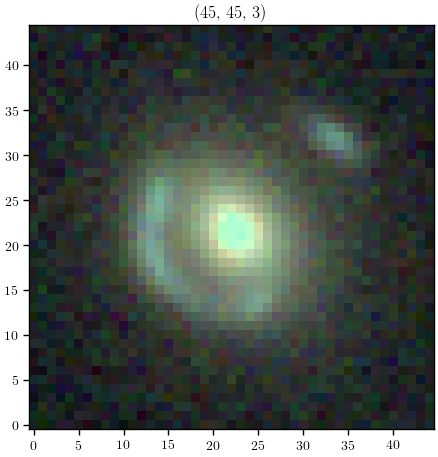

In [3]:
color_dir = config.machine.dir_05
pickle_dir = config.machine.dir_03
lens, rgb_model, rgb_image = lens_util.get_sample(pickle_dir, color_dir, 80)

plt.imshow(rgb_image)
plt.title(rgb_image.shape)
plt.show()

In [4]:
print(lens.z_lens, lens.z_source)

0.22317401821210708 0.7378049091107377


In [22]:
print(lens.lens_stellar_mass, lens.lens_vel_disp, lens.snr)

111558627652.49892 247.52630350114026 None


In [8]:
print(lens.lens_model_list)
pprint(lens.kwargs_lens[:3])

['SIE', 'SHEAR', 'CONVERGENCE', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 'TNFW', 

In [29]:
lens.kwargs_model['lens_model_list'] = lens.kwargs_model['lens_model_list'][:3]
lens.kwargs_model['lens_redshift_list'] = lens.kwargs_model['lens_redshift_list'][:3]

pprint(lens.kwargs_model)

{'cosmo': FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897),
 'lens_light_model_list': ['SERSIC_ELLIPSE'],
 'lens_model_list': ['SIE', 'SHEAR', 'CONVERGENCE'],
 'lens_redshift_list': [0.22317401821210708,
                        0.22317401821210708,
                        0.22317401821210708],
 'source_light_model_list': ['SERSIC_ELLIPSE'],
 'source_redshift_list': [0.7378049091107377],
 'z_source': 0.7378049091107377,
 'z_source_convention': 5}


In [23]:
pprint(lens.lens_mags)

{'F106': 17.933142571974678,
 'F129': 17.641112131668187,
 'F184': 17.368527542716492}


In [24]:
pprint(lens.source_mags)

{'F106': 22.474901905252928,
 'F129': 22.314280044141306,
 'F184': 22.064682696345315}
